In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import pearsonr, t

# Part a: Generate 10,000 values from an AR(1) model
np.random.seed(0)  # For reproducibility
n = 10000
phi = 0.6
X = [np.random.normal()]
for _ in range(1, n):
    X.append(phi * X[-1] + np.random.normal())
X = np.array(X)

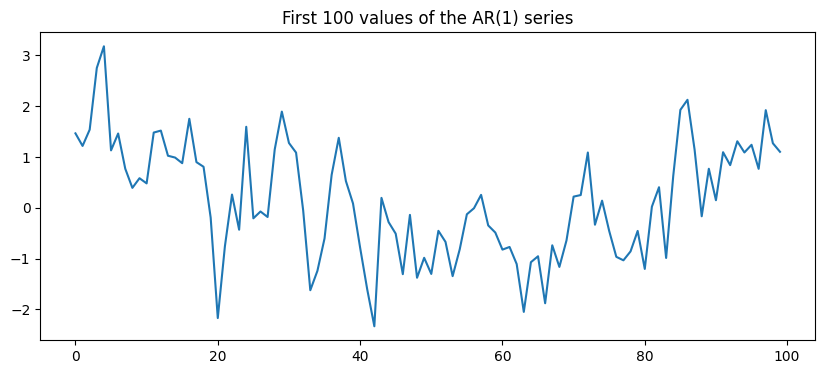

It seems that there is a memory (or persistence) in the series. The values tend to decrease in the first half and then tend to increase.


In [15]:
X = (X - np.mean(X)) / np.std(X)  # Standardize

# Plot the first 100 values
plt.figure(figsize=(10, 4))
plt.plot(X[:100])
plt.title('First 100 values of the AR(1) series')
plt.show()
print('It seems that there is a memory (or persistence) in the series. The values tend to decrease in the first half and then tend to increase.')

<Figure size 1000x400 with 0 Axes>

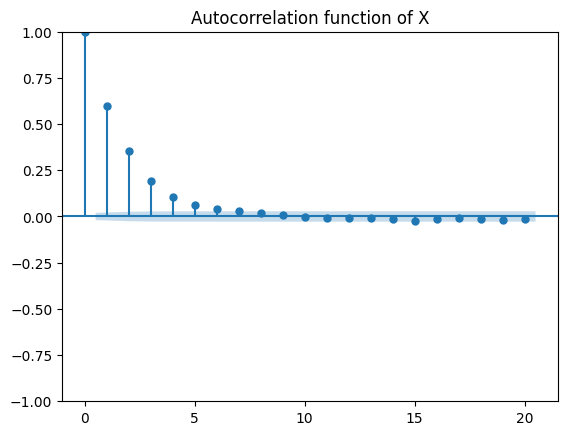

In [16]:
# Plot the autocorrelation function
plt.figure(figsize=(10, 4))
plot_acf(X, lags=20)
plt.title('Autocorrelation function of X')
plt.show()

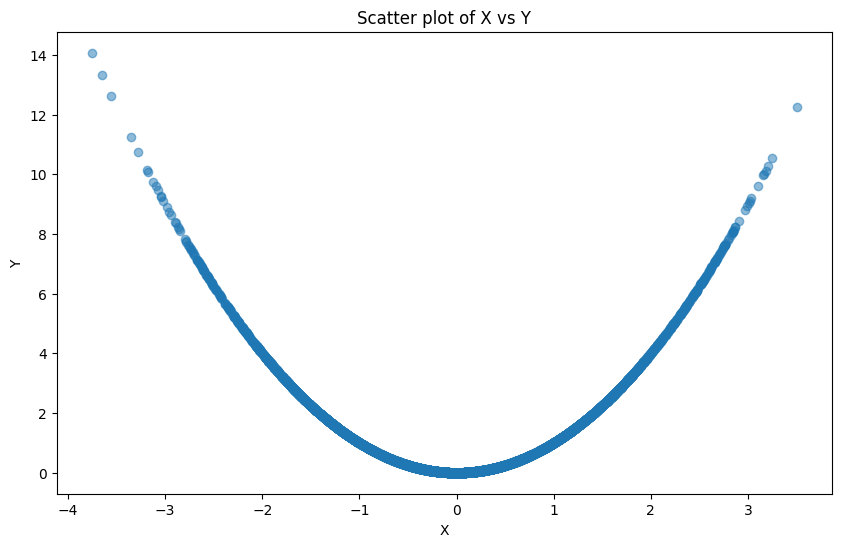

There is a clear dependence between Y and X. It seems to be a "U" type of dependence. This is expected, since we defined Y as: Y=X^2


In [17]:
# Part b: Generate Y by squaring X and plot scatter plot
Y = X**2
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5)
plt.title('Scatter plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print('There is a clear dependence between Y and X. It seems to be a "U" type of dependence. This is expected, since we defined Y as: Y=X^2')

In [18]:
# Calculate Pearson correlation between X and Y
corr, _ = pearsonr(X, Y)
print(f'Pearson correlation between X and Y: {corr}')

# Calculate effective sample size N_eff for X and Y
r_1 = pd.Series(X).autocorr(lag=1)
r_2 = pd.Series(Y).autocorr(lag=1)
N_eff = n * (1 - r_1 * r_2) / (1 + r_1 * r_2)
t_stat = corr * np.sqrt(N_eff / (1 - corr**2))
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=N_eff-2))
print(f'P-value for testing the null hypothesis that the true correlation is zero: {p_value}')
print('Thus, for a significance level a=0.05, I fail to reject the null hypothesis. There is no robust evidence that the two series are dependent based on Pearson correlation.')

Pearson correlation between X and Y: 0.017764968317630275
P-value for testing the null hypothesis that the true correlation is zero: 0.15312552928646994
Thus, for a significance level a=0.05, I fail to reject the null hypothesis. There is no robust evidence that the two series are dependent based on Pearson correlation.


In [19]:
# Part c: Composite analysis for X > 2
YX_gt_2 = Y[X > 2]
avg_Y = np.mean(YX_gt_2)
print(f'Average value of Y for samples where X > 2: {avg_Y}')
N_eff_mean = len(YX_gt_2) * (1 - r_2) / (1 + r_2)
t_stat_mean = (avg_Y-1) / (np.std(YX_gt_2) / np.sqrt(N_eff_mean))
p_value_mean = 2 * (1 - t.cdf(np.abs(t_stat_mean), df=N_eff_mean-1))
print(f'P-value for testing the null hypothesis that the true mean of Y when X > 2 is equal to 1: {p_value_mean}')
print('Thus, for a significance level a=0.05, we reject the null hypothesis. There is robust evidence that the two series are dependent based on composite analysis.')

# Conclusions
print('Conclusion: The Pearosn correlation and composite analysis are different ways to assess dependence between different variables. Pearson correlation can detect only linear relationships. We should always take autocorrelation into account!')


Average value of Y for samples where X > 2: 5.854604651582627
P-value for testing the null hypothesis that the true mean of Y when X > 2 is equal to 1: 0.0
Thus, for a significance level a=0.05, we reject the null hypothesis. There is robust evidence that the two series are dependent based on composite analysis.
Conclusion: The Pearosn correlation and composite analysis are different ways to assess dependence between different variables. Pearson correlation can detect only linear relationships. We should always take autocorrelation into account!
